# Machine learnig 

# Linear regression

* y = a + bx + b1 x1 + b2 x2 .......
* y => dependent / target (1) [1D]
* x => independent / features (n) [2D]

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [64]:
#independent
time=np.array([5,7,12,16,20]).reshape(-1,1)

In [5]:
#dependent
mass=np.array([40,120,180,210,240])

In [6]:
mymodel = LinearRegression()

In [8]:
#fit-used to trains  the model
mymodel.fit(time,mass)

LinearRegression()

In [11]:
x=int(input("Enter the time in minutes : "))
result = mymodel.predict([[x]])#predict ehich predict the output ,passing int var (time 2D)
print("if the time is ",x," minutes the mass is ",result[0]," grams ")

Enter the time in minutes :  4


if the time is  4  minutes the mass is  60.33766233766232  grams 


In [12]:
mass_model = mymodel.predict(time)
print(mass_model)

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


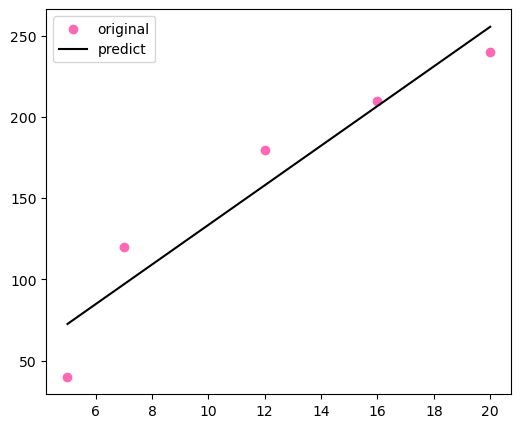

In [14]:
#plotting original values - scatter 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(time,mass,label='original',color='hotpink')
#plotting predict values in lines 
plt.plot(time,mass_model,label='predict',color='k')
plt.legend()
plt.show()

Libraries -> load data -> split data -> create & train -> test -> Evaluate

split-  train  predict

Evaluation : 
R-square
- Lower , the better 

In [89]:
r2s = r2_score(mass,mass_model)
print(r2s)#result is more than 0.5 then the result prediction are good

0.9078579648199901


MSE
- lower the better 

In [90]:
mse = mean_squared_error(mass,mass_model)
print(mse)#biggest values in that

465.87012987012986


MAE

* lower the better 

In [92]:
mae = mean_absolute_error(mass,mass_model)
print(mae)

19.283116883116882


linear regression on large data , only accepects the numerical values

case study : predicting the salary from age ,experiance,genedr ,education 

1. import libraries 
2. load data
3. clean data(nulls , duplicates)
4. preprocessing
5. split data 
6. create and train model 
7. test the model
8. Evaluation

1. importing the libraries

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
from sklearn.model_selection import train_test_split

load the data

In [66]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\my_python\Salary_EDA.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


clean data 

In [67]:
df.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
dtype: int64

In [68]:
df.dropna(inplace = True )
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

data preprocessing 

In [69]:
ge=LabelEncoder()
df['gendercode']=ge.fit_transform(df['Gender'])
#encoding edu_level
edu=LabelEncoder()
df['edu_code']=edu.fit_transform(df['Education Level'])
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,gendercode,edu_code
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


split the data into independent and dependent 

In [70]:
# x- independent , y- dependent 
x = df[['Age','gendercode','edu_code','Years of Experience']] # [ 2D]
y = df['Salary'] # [1D]

split the data into train and test

In [71]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state = 42 )
#total 700 records
#x_train - 560(age ,edu,gen), train  paper 
#x_test - 140(age,edu,gen), question paper
#y_train - 560(sal),train paper answer
#y_test - 140(sal) , answer paper                                             

create a model and train

In [72]:
sal_model = LinearRegression()
sal_model.fit(x_train,y_train)

LinearRegression()

Test

In [80]:
a=float(input("enter the age"))
g_user= input("enter your gender(Male,Female) :")
ed_user= input(" enter your education level (Bachelor's,Master's,PhD): ")
exp= float(input("enter your experiance in your :"))

enter the age 45
enter your gender(Male,Female) : Male
 enter your education level (Bachelor's,Master's,PhD):  PhD
enter your experiance in your : 8


In [81]:
gen_enc=ge.transform([g_user])[0]
edu_enc=edu.transform([ed_user])[0]
print(gen_enc,edu_enc)

1 2


In [84]:
result=sal_model.predict([[a,gen_enc,edu_enc,exp]])
print("the predivted salary is : ",result[0])

the predivted salary is :  136557.9697061547


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Evaluation 
* predict test values
* visulaize
* metrics

In [95]:
model_p= sal_model.predict(x_test)

In [93]:
len(y_test)

74

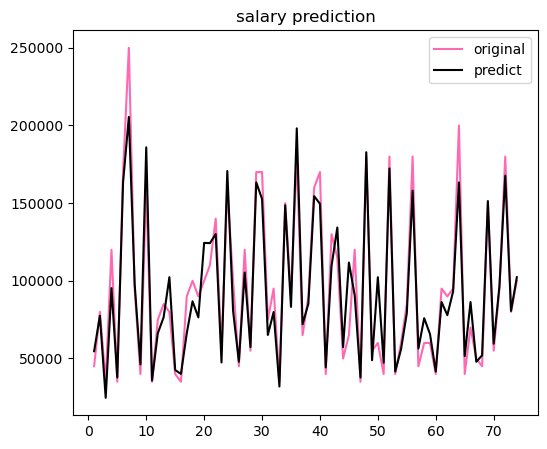

In [97]:
#plotting original values
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(np.arange(1,75),y_test,label='original',color='hotpink')
#plotting predict values in lines 
plt.plot(np.arange(1,75),model_p,label='predict',color='k')
plt.title("salary prediction")
plt.legend()
plt.show()